<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Función que calcula e^(-x)

def serie_exponencial(x,n): # para x = float ; nmax = 171
  i = 0
  suma = 0
  while i < n:

    exp = (x)**(i)/np.math.factorial(i)
    i += 1
    suma += exp

  return suma

serie_exponencial(-10,171)

4.5399929433607724e-05

In [4]:
# Hallar N para minimizar el error a 1x10^-7

serie_exponencial(1,171) - np.exp(1)

# A partir de n = 11, tenemos un error menor a 1x10^-7 en comparación de np.exp(x)

4.440892098500626e-16

[]

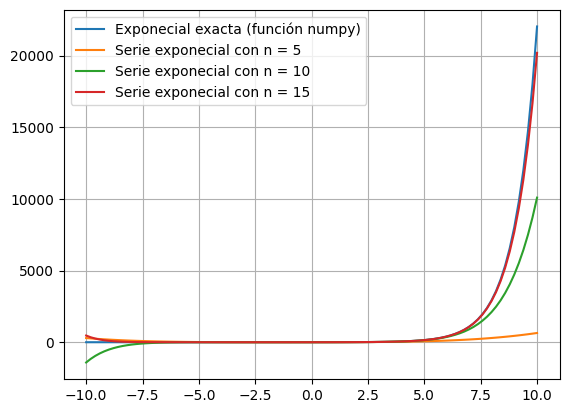

In [5]:
# Graficación de error

x = np.linspace(-10,10,100)

exp_exacta = np.exp(x)

exp_n5 = serie_exponencial(x,5)
exp_n10 = serie_exponencial(x,10)
exp_n15 = serie_exponencial(x,15)


plt.plot(x,exp_exacta,label="Exponecial exacta (función numpy)")
plt.plot(x,exp_n5, label="Serie exponecial con n = 5")
plt.plot(x,exp_n10, label="Serie exponecial con n = 10")
plt.plot(x,exp_n15, label="Serie exponecial con n = 15")
plt.grid()
plt.legend()
plt.plot()

In [10]:
# Serie S1N

def serie_s1n(n):
  i = 0
  suma = 0
  while i < n:

    serie = (-1**(i))*(i/(i+1))
    i += 1
    suma += serie

  return suma

serie_s1n(1000)

-992.5145291394504

In [20]:
# Serie S2N

def serie_s2n(n):

  i = 1
  suma = 0
  while i < n:

    serie = -(2*i - 1)/(2*i) + (2*i/(2*i + 1))
    suma += serie
    i += 1

  return suma

serie_s2n(1e6)


0.30685256943989647

In [12]:
# Serie S3N

def serie_s3n(n):

  i = 1
  suma = 0
  while i < n:

    serie = (1/(2*i)*(2*i + 1))
    suma += serie
    i += 1

  return suma

serie_s3n(1000)

1002.7422354302743

La suma $\mathrm{S}_N^{(1)}$ tiende a $-\infty$, la suma  $\mathrm{S}_N^{(2)}$ tiende a 0.3068... y la suma $\mathrm{S}_N^{(3)}$ a $∞$.

In [30]:
# Tablas logaritmicas

n = np.arange(0,100,1)
suma1 = serie_s1n(n)
suma2 = serie_s2n(n)
suma3 = serie_s3n(n)

plt.figure(figsize=(12,5))

plt.title("serie s1n vs serie s3n")
plt.subplot()

ValueError: ignored